## This projet is about classifying twitter posts
* Its mainly for practicing on applying training sets and handing textual data

##  The project will go as follows:

Apply python libraries to import and visualize datasets

Perform exploratory data analysis and plot word-cloud

Perform text data cleaning such as removing punctuation and stop words

Understand the concept of count vectorization (tokenization)

Perform tokenization to tweet text using Scikit Learn

Understand the theory and intuition behind Naïve Bayes classifiers

Understand the difference between prior probability, posterior probability and likelihood

Train Naïve Bayes classifier models using Scikit-Learn to preform classification

Evaluate the performance of trained Naïve Bayes Classifier model using confusion matrices

* The Problem Statement and business case 


* Import libraries and datasets


In [4]:
!pip install jupyterthemes

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [6]:
twitter = pd.read_csv('twitter.csv')
twitter

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

-----------------------

* Perform Exploratory Data Analysis

In [8]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
twitter.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [10]:
# Drop the 'id' column
tweets_df = twitter.drop(['id'], axis=1)

<Axes: >

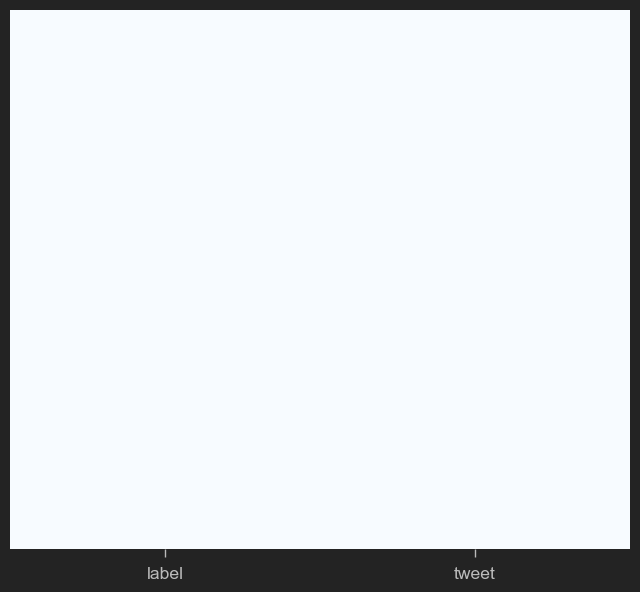

In [11]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [12]:
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31956      0  off fishing tomorrow @user carnt wait first ti...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31961      0                   thank you @user for you follow  

[29720 rows x 2 columns]

In [13]:
negative = tweets_df[tweets_df['label']==1]
negative

label                                              tweet
13         1  @user #cnn calls #michigan middle school 'buil...
14         1  no comment!  in #australia   #opkillingbay #se...
17         1                             retweet if you agree! 
23         1    @user @user lumpy says i am a . prove it lumpy.
34         1  it's unbelievable that in the 21st century we'...
...      ...                                                ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...
31947      1  @user @user you don't have the balls to hashta...
31948      1   makes you ask yourself, who am i? then am i a...
31960      1  @user #sikh #temple vandalised in in #calgary,...

[2242 rows x 2 columns]

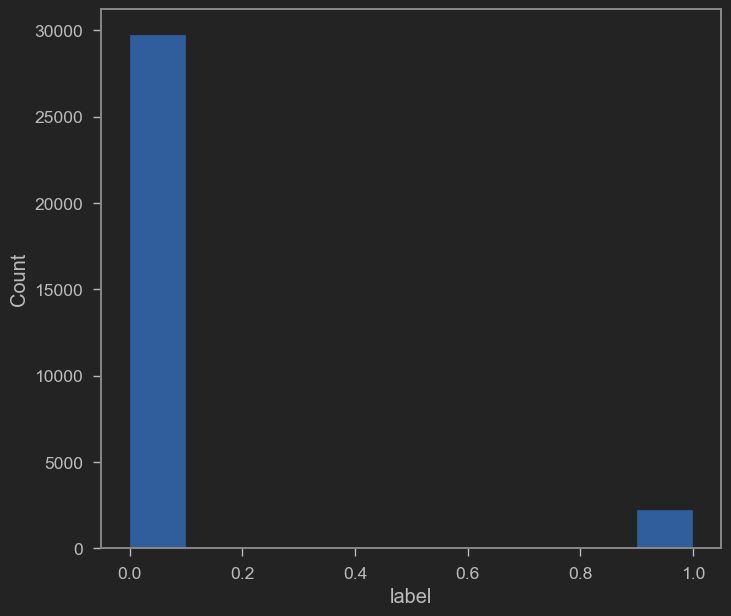

In [14]:
sns.histplot(data=tweets_df, x='label', bins=10, kde=False)
plt.show()

In [15]:
tweets_df['word_count'] = tweets_df['tweet'].apply(lambda x: len(str(x).split()))
tweets_df['lenth'] = tweets_df['tweet'].apply(lambda x: len(str(x)))
tweets_df

label                                              tweet  word_count  \
0          0   @user when a father is dysfunctional and is s...          18   
1          0  @user @user thanks for #lyft credit i can't us...          19   
2          0                                bihday your majesty           3   
3          0  #model   i love u take with u all the time in ...          14   
4          0             factsguide: society now    #motivation           4   
...      ...                                                ...         ...   
31957      0  ate @user isz that youuu?ðððððð...           5   
31958      0    to see nina turner on the airwaves trying to...          23   
31959      0  listening to sad songs on a monday morning otw...          13   
31960      1  @user #sikh #temple vandalised in in #calgary,...          10   
31961      0                   thank you @user for you follow             6   

       lenth  
0        102  
1        122  
2         21  
3         86  
4         39  
...      ...  
31957     68  
31958    131  
31959     63  
31960     67  
31961     32  

[31962 rows x 4 columns]

In [16]:
tweets_df.describe()

label   word_count         lenth
count  31962.000000  31962.00000  31962.000000
mean       0.070146     13.15872     84.739628
std        0.255397      5.47815     29.455749
min        0.000000      3.00000     11.000000
25%        0.000000      9.00000     63.000000
50%        0.000000     13.00000     88.000000
75%        0.000000     17.00000    108.000000
max        1.000000     34.00000    274.000000

In [17]:
tweets_df.loc[tweets_df['lenth'].idxmin()]

label                   0
tweet         i love you 
word_count              3
lenth                  11
Name: 25195, dtype: object

* this is the shortest tweet

In [19]:
tweets_df.loc[tweets_df['lenth'].idxmax()]

label                                                         0
tweet          @user lmfao pathetic #soit   #growup #funny #...
word_count                                                    9
lenth                                                       274
Name: 19770, dtype: object

* this is the longest tweet

In [21]:
tweets_df.loc[tweets_df['lenth']==84]

label                                              tweet  word_count  \
43         0  my mom shares the same bihday as @user   bihda...          15   
220        0  g o a l s ð repost from @user #propey #ocea...          16   
640        0  oscar tabarez talks luis suarezâs angry reac...          11   
723        0   @user another hands &amp; feet complete!! ber...          13   
742        0  because great things never came from comfo zon...          11   
...      ...                                                ...         ...   
31445      0  .@user on making choices to keep herself   as ...          15   
31448      0  i'm a gordo. #passpo #florence #firenze #italy...          11   
31509      0  just 3 keys that are found on your computer to...          14   
31857      0  traveling happy #family   holidays #car #sunny...          10   
31883      0  we spent #familytime by doing simple wefie, we...          11   

       lenth  
43        84  
220       84  
640       84  
723       84  
742       84  
...      ...  
31445     84  
31448     84  
31509     84  
31857     84  
31883     84  

[333 rows x 4 columns]

* all these tweets have the average lengh of tweets, that 84

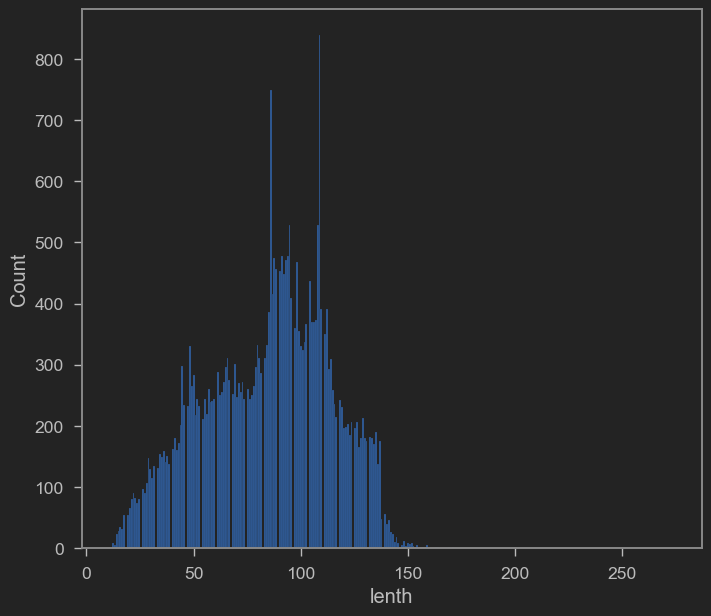

In [23]:
sns.histplot(data=tweets_df, x='lenth', bins=300, kde=False)
plt.show()

-------------------------------

* Plot the word cloud - all tweets


In [25]:
textual_data = tweets_df['tweet'].tolist()
len(textual_data)

31962

In [26]:
combined_textual_data=" ".join(textual_data)

In [27]:
combined_textual_data

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [28]:
!pip install wordcloud

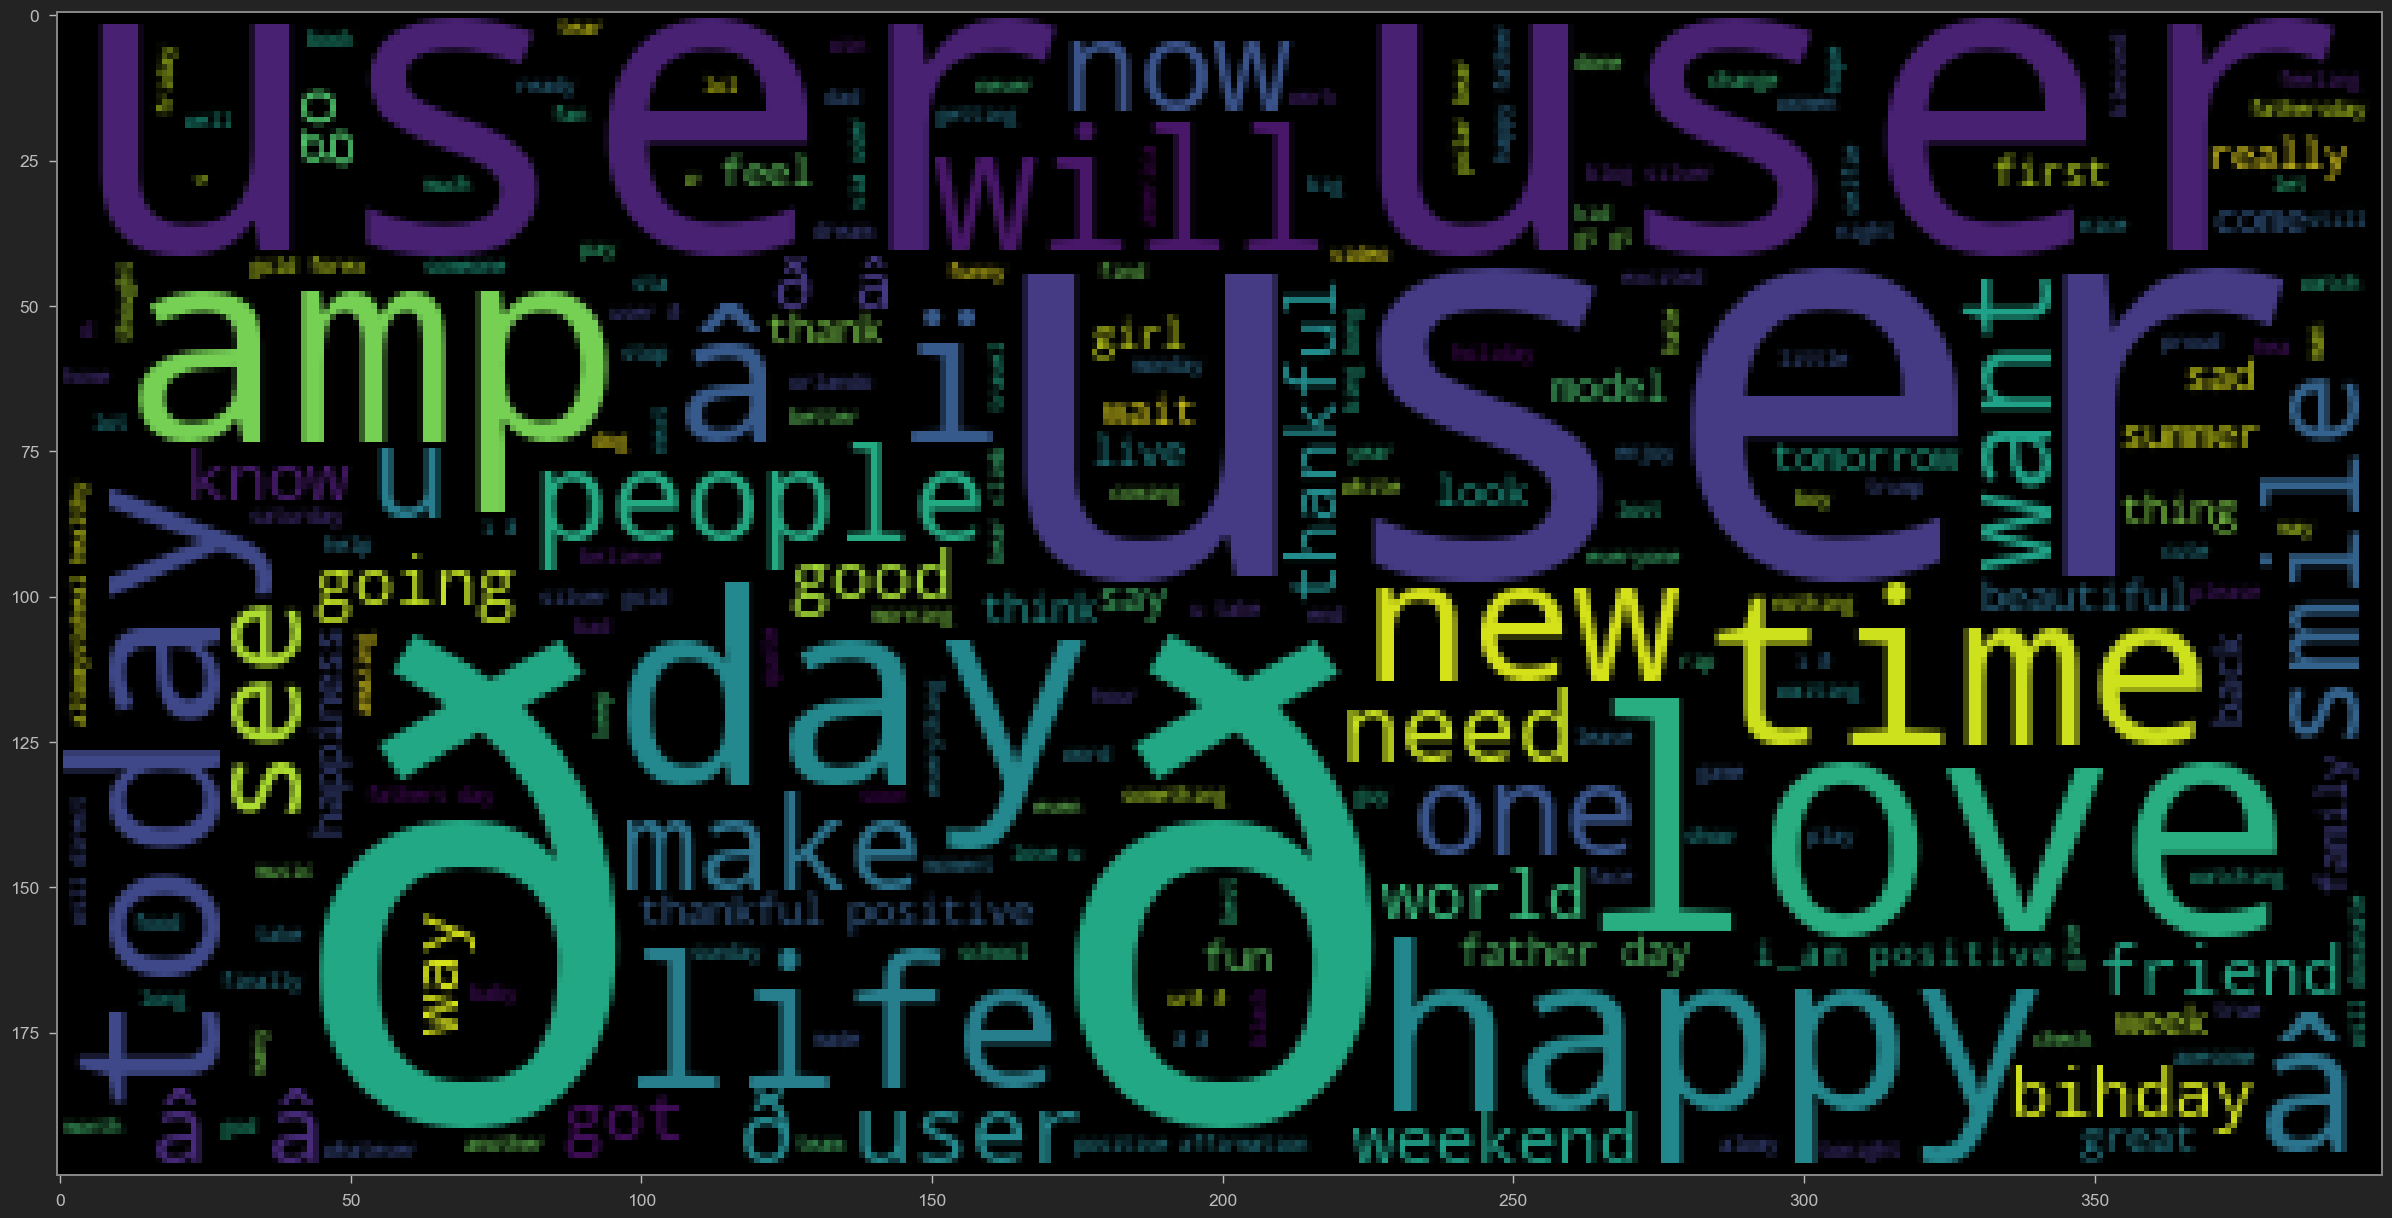

In [29]:
from wordcloud import WordCloud

plt.figure(figsize=(30,20))
plt.imshow(WordCloud().generate(combined_textual_data))

-----------------------

* this is the negative tweets wordcloud

In [31]:
negative_textual_cloud = negative['tweet'].tolist()
len(negative_textual_cloud)

2242

In [32]:
negative_textual_cloud="".join(negative_textual_cloud)
negative_textual_cloud

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot  no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphinsretweet if you agree! @user @user lumpy says i am a . prove it lumpy.it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia @user lets fight against  #love #peace ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness  @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦how the #altright uses  &amp; insecurity to lure men into #whitesupremacy    @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦@user why not @user mocked obama for being black.  @user @user @user @user #brexit#people aren\'t protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â

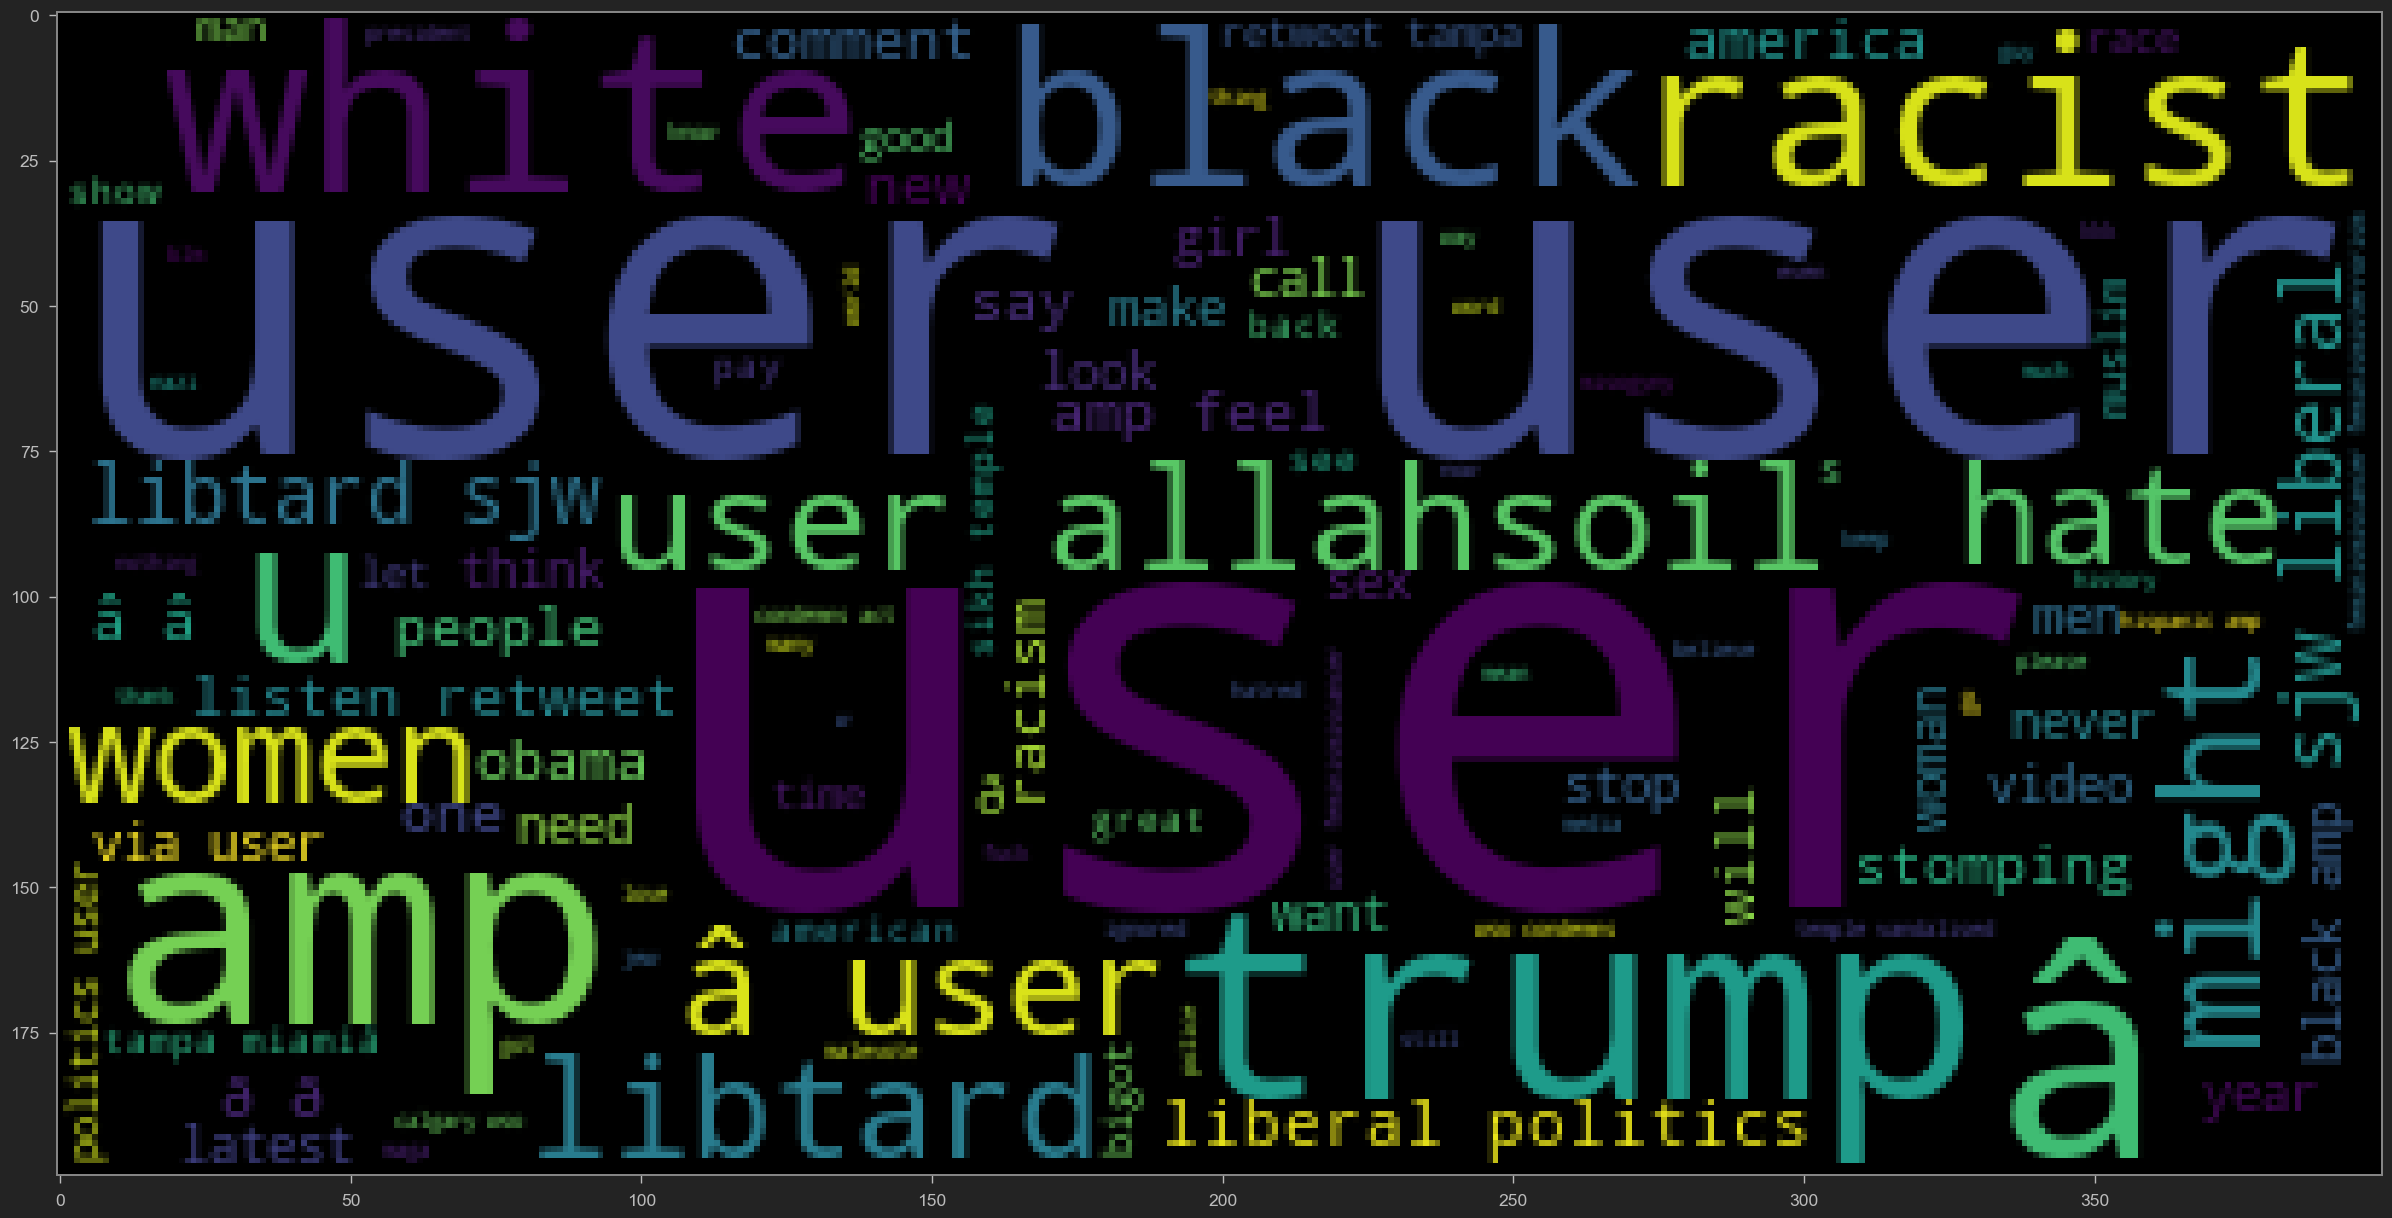

In [33]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud().generate(negative_textual_cloud))

---------------------
* this is the positive tweets wordcloud

In [35]:
positive_textual_cloud = positive['tweet'].tolist()
len(positive_textual_cloud)

29720

In [36]:
positive_textual_cloud="".join(positive_textual_cloud)
positive_textual_cloud

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦   factsguide: society now    #motivation[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo   @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦  @user @user welcome here !  i\'m   it\'s so #gr8 !  â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2%

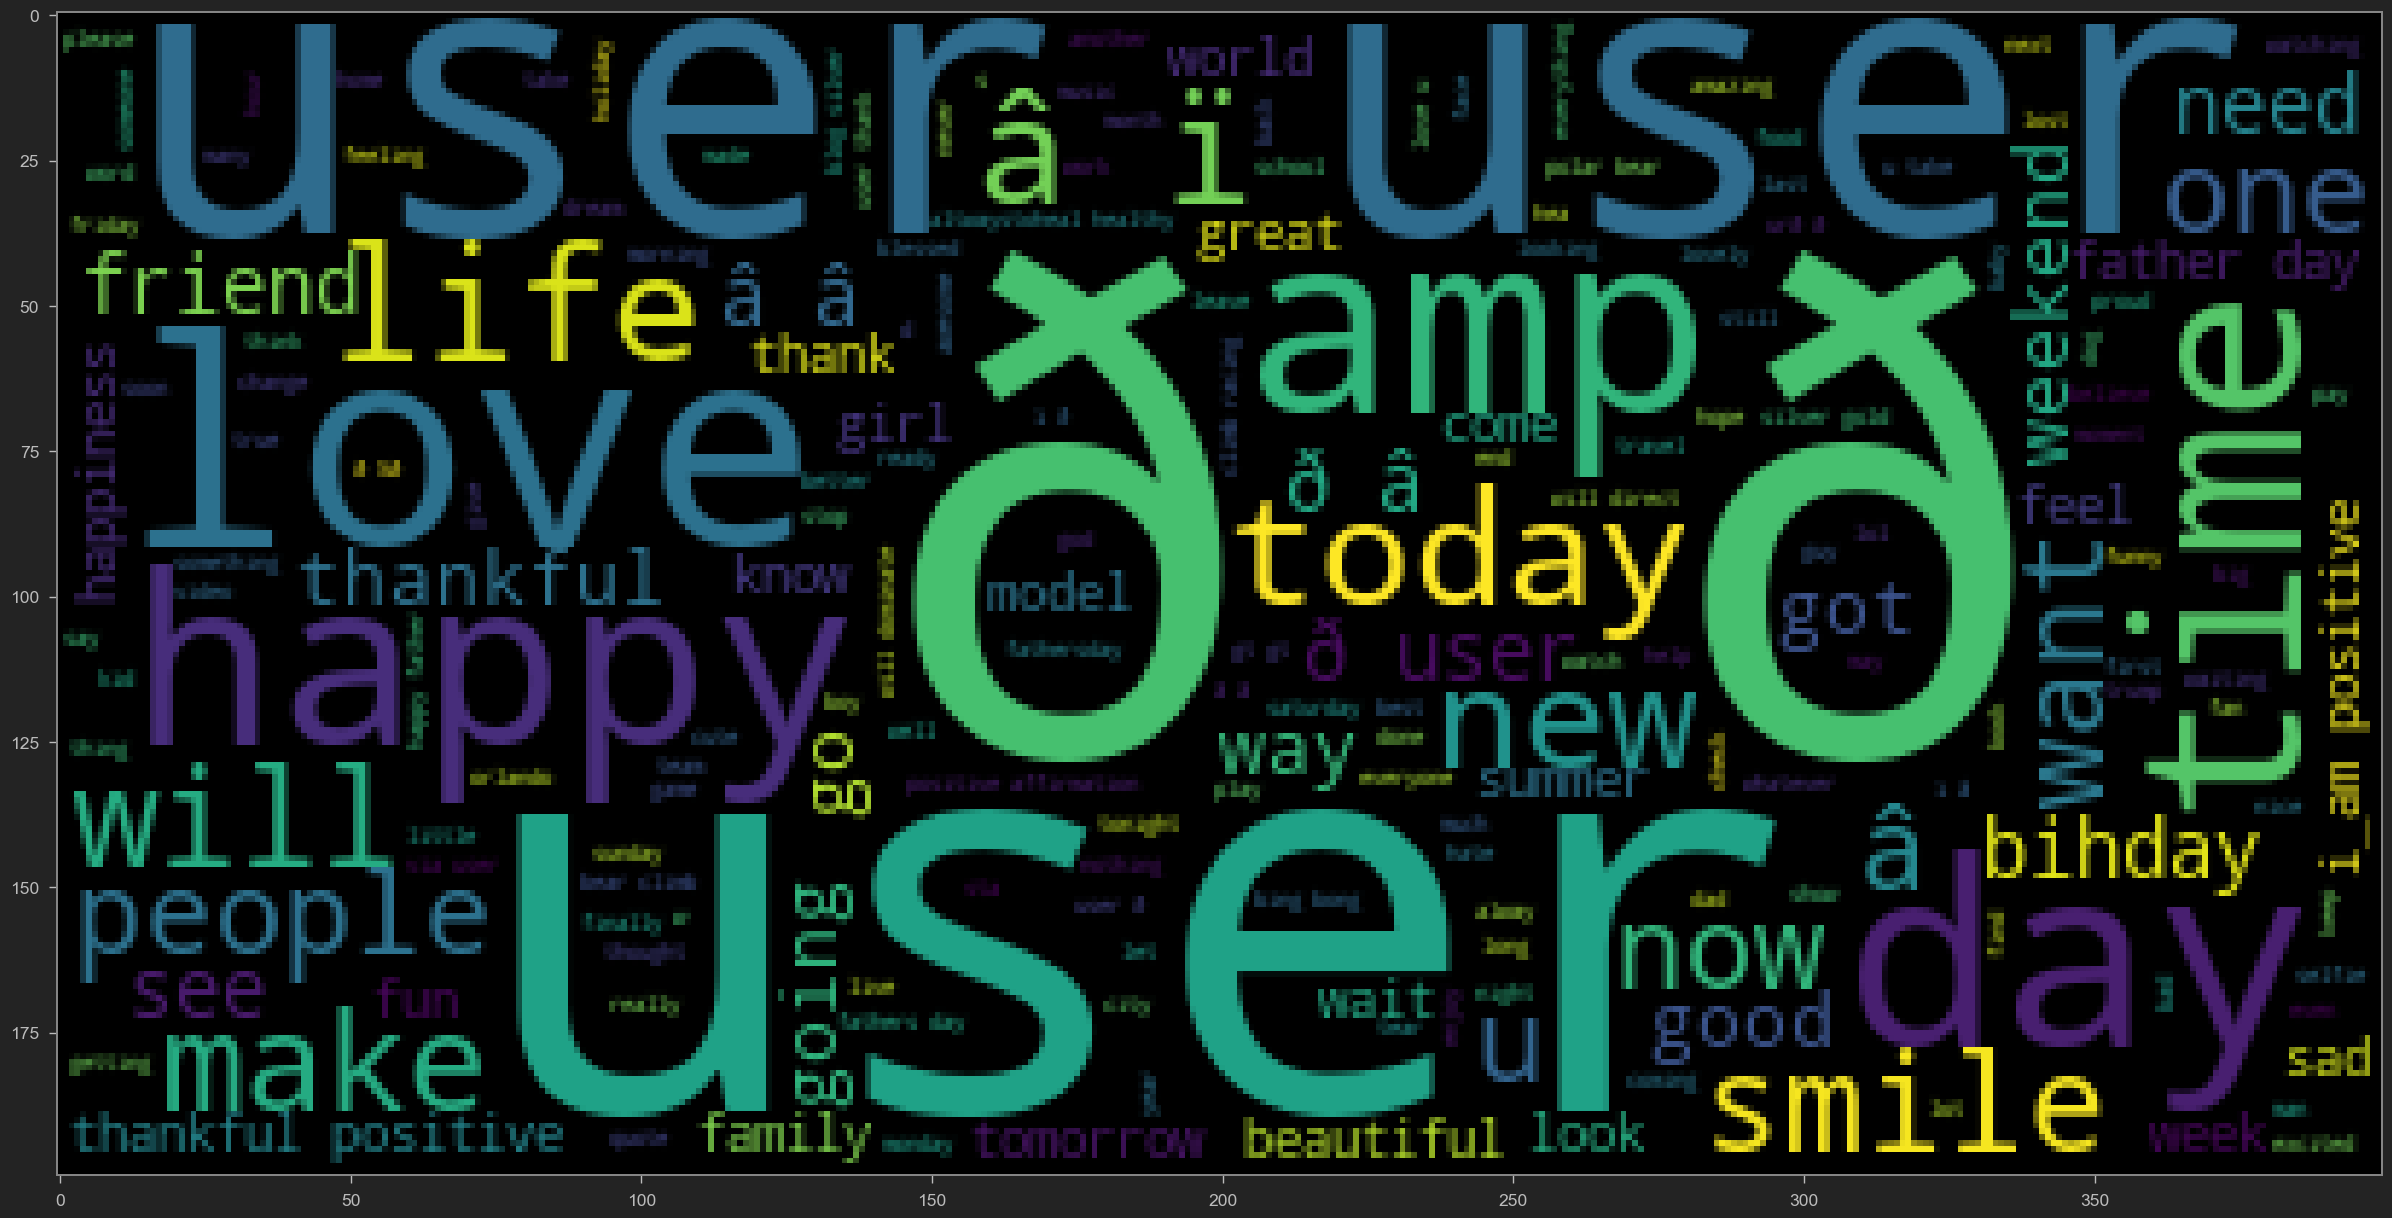

In [37]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud().generate(positive_textual_cloud))

* this is the negative tweets wordcloud

---------------------

* Perform data cleaning - removing punctuation & stop words, what i aim here is to create a pipleine to prepare the data for tokanization:
* 
* remove puncutation
* remove stop words
* count vectorization

In [40]:
import string
string.punctuation
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
def message_cleaning(message):
    
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    
    Test_punc_removed_join = ''.join(Test_punc_removed)
    stop_words = stopwords.words('english')
    Test_stop_removed = [word for word in Test_punc_removed_join.split() if word.lower() not in stop_words]
    
    return Test_stop_removed

In [42]:
def message_cleaning(message):
    
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_stop_removed = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_stop_removed

In [43]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       31962 non-null  int64 
 1   tweet       31962 non-null  object
 2   word_count  31962 non-null  int64 
 3   lenth       31962 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


In [44]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [45]:
tweets_df_clean.head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, u, take, u, time, urð±, ðð...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

* i created a funtion that cleans puntuation and stopwords in order to clean the tweet data as much as possible
* this will help me to reduce redundant data and prepare the data im going to feed to the ML algorithm

 ------------------

* Perform Count Vectorization (Tokenization)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [50]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [51]:
print(tweets_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
tweets_countvectorizer.shape

(31962, 47386)

In [53]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [54]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [55]:
y = tweets_df['label']

---------------
* a small teoretical reminder on how vectorizers work|

In [57]:
mini = ['hello world','hello hello world','hello world world world']

In [58]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [59]:
vectorizer_mini = CountVectorizer()
mini_countvectorizer = vectorizer.fit_transform(mini)
print(mini_countvectorizer.toarray())

[[1 1]
 [2 1]
 [1 3]]


-----------------------------

* Understand the theory and intuition behind Naive Bayes classifiers

  - naive bayes is a classification technique based on bayes teorem
  - its based on prior probability(1), since we have more x than y in the dataset we can assume that
    a new point will more likely to be more x than y.
    
  - another assumption is likelihood(2), if there are blue points in its vacinity, it is more likely that the new\
    point will be classfied as Blue. so we can assume the calegory of the value based on the values that sorround
    it.
    
  - posterior probability(3) is combining the probability and likelihood(by multimplying)

    


In [62]:
X.shape

(31962, 47386)

In [63]:
y.shape

(31962,)

In [64]:
from sklearn.model_selection import train_test_split
#-------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

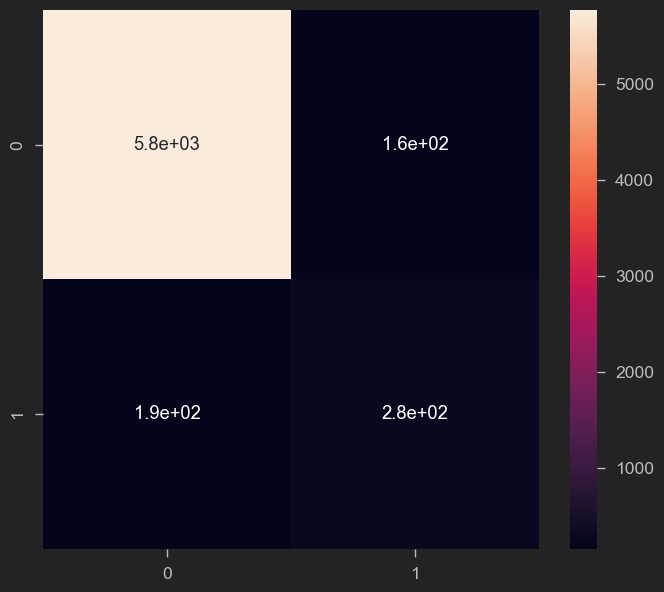

In [67]:
# here we test the model we trained

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5927
           1       0.63      0.59      0.61       466

    accuracy                           0.95      6393
   macro avg       0.80      0.78      0.79      6393
weighted avg       0.94      0.95      0.94      6393



* Assess trained model performance

---------------------------

* this project is another naive bayes analysis on a specific product in an amazon store

## we are going to perform a sentiment analysis amazon reviews 

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [73]:
# Load the data
amazon_reviews = pd.read_csv('amazon_reviews.csv')
amazon_reviews

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [74]:
amazon_reviews.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [75]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: >

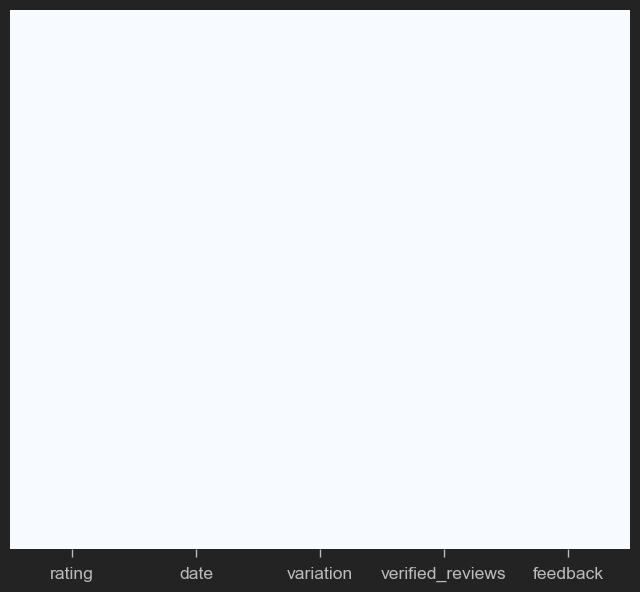

In [76]:
 sns.heatmap(amazon_reviews.isnull(), yticklabels = False, cbar = False, cmap="Blues")

* we see that there are no null values in the data set, so we can continue the explore and learn more about it by using graphs

In [78]:
#positive and negative

positive = amazon_reviews[amazon_reviews['feedback'] == 1]
negative = amazon_reviews[amazon_reviews['feedback'] == 0]

In [79]:
positive.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [80]:
negative.head()

rating       date             variation  \
46        2  30-Jul-18      Charcoal Fabric    
111       2  30-Jul-18      Charcoal Fabric    
141       1  30-Jul-18      Charcoal Fabric    
162       1  30-Jul-18     Sandstone Fabric    
176       2  30-Jul-18  Heather Gray Fabric    

                                      verified_reviews  feedback  
46   It's like Siri, in fact, Siri answers more acc...         0  
111  Sound is terrible if u want good music too get...         0  
141                                 Not much features.         0  
162  Stopped working after 2 weeks ,didn't follow c...         0  
176                               Sad joke. Worthless.         0

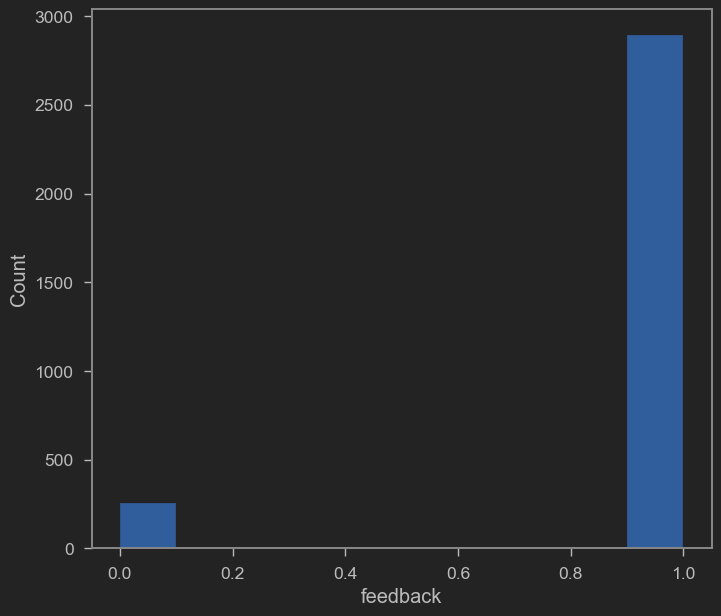

In [81]:
sns.histplot(data=amazon_reviews, x='feedback', bins=10, kde=False)
plt.show()

* we learn that the majkority of the feedback is positive.

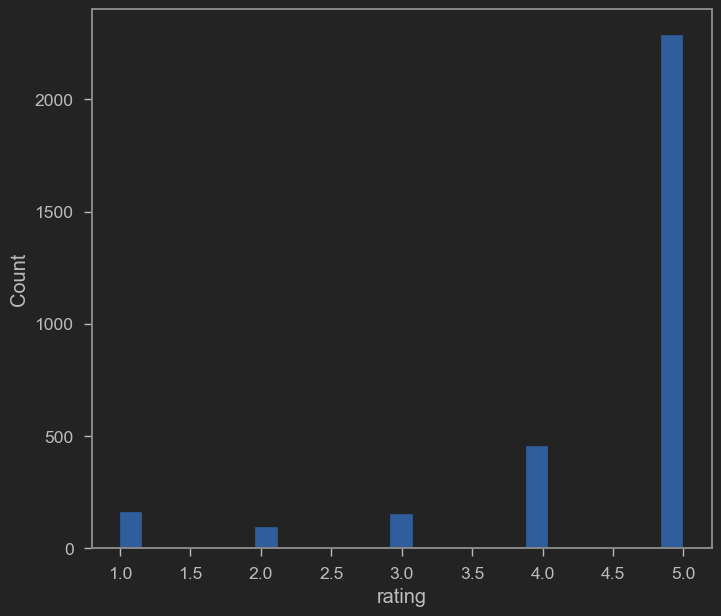

In [83]:
sns.histplot(data=amazon_reviews, x='rating', bins=25, kde=False)
plt.show()

In [84]:
amazon_reviews['id'] = amazon_reviews.index

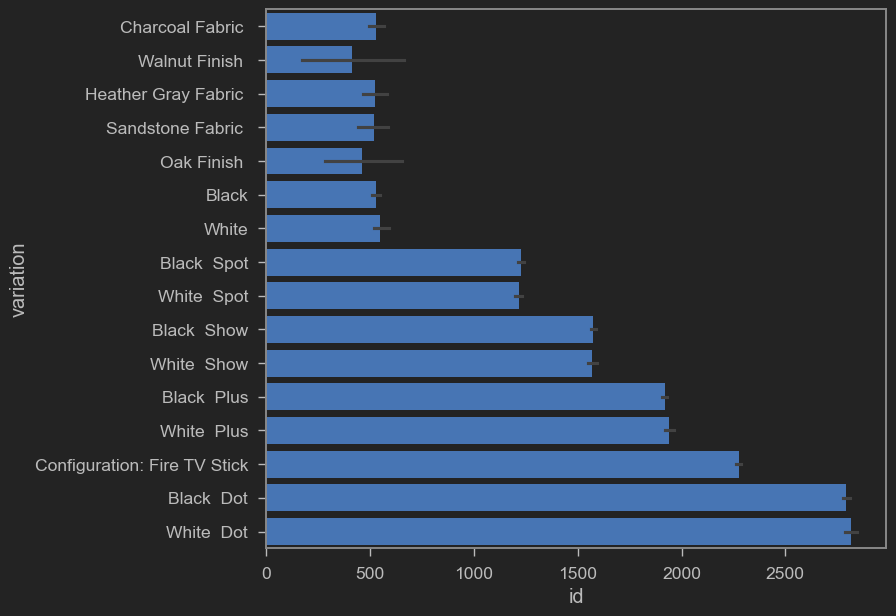

In [85]:
sns.barplot(amazon_reviews, x='id', y='variation')
plt.show()

In [86]:
unique_variations = amazon_reviews['variation'].nunique()
print("Number of unique names:", unique_variations)

Number of unique names: 16


In [87]:
amazon_reviews

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback    id  
0                                         Love my Echo!         1     0  
1                                             Loved it!         1     1  
2     Sometimes while playing a game, you can answer...         1     2  
3     I have had a lot of fun with this thing. My 4 ...         1     3  
4                                                 Music         1     4  
...                                                 ...       ...   ...  
3145  Perfect for kids, adults and everyone in betwe...         1  3145  
3146  Listening to music, searching locations, check...         1  3146  
3147  I do love these things, i have them running my...         1  3147  
3148  Only complaint I have is that the sound qualit...         1  3148  
3149                                               Good         1  3149  

[3150 rows x 6 columns]

In [88]:
amazon_reviews_clean = amazon_reviews.dropna()


In [89]:
amazon_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   id                3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [90]:
# Ensure you're working with a copy
amazon_reviews_clean = amazon_reviews_clean.copy()

# Now safely add the new column
amazon_reviews_clean['length'] = amazon_reviews_clean['verified_reviews'].apply(len)


In [91]:
amazon_reviews_clean

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback    id  \
0                                         Love my Echo!         1     0   
1                                             Loved it!         1     1   
2     Sometimes while playing a game, you can answer...         1     2   
3     I have had a lot of fun with this thing. My 4 ...         1     3   
4                                                 Music         1     4   
...                                                 ...       ...   ...   
3145  Perfect for kids, adults and everyone in betwe...         1  3145   
3146  Listening to music, searching locations, check...         1  3146   
3147  I do love these things, i have them running my...         1  3147   
3148  Only complaint I have is that the sound qualit...         1  3148   
3149                                               Good         1  3149   

      length  
0         13  
1          9  
2        195  
3        172  
4          5  
...      ...  
3145      50  
3146     135  
3147     441  
3148     380  
3149       4  

[3149 rows x 7 columns]

<Axes: ylabel='Frequency'>

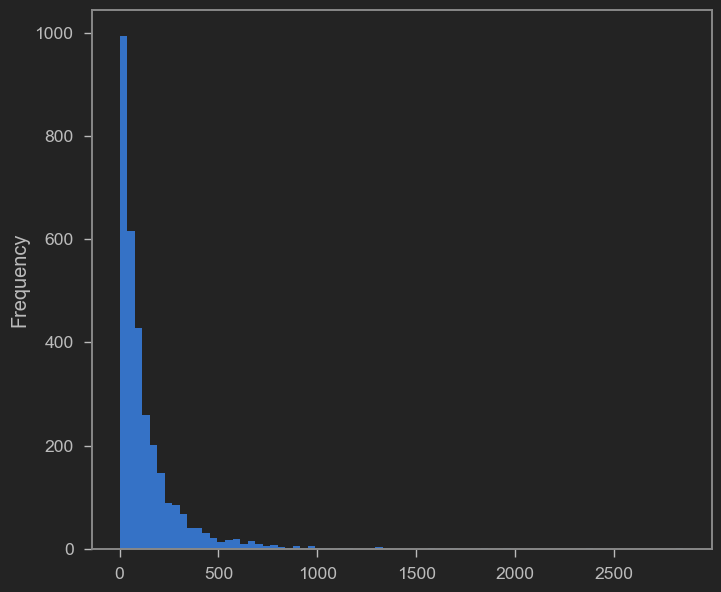

In [92]:
# Plot the histogram for the length
amazon_reviews_clean['length'].plot(bins=75, kind='hist') 

<Axes: ylabel='date'>

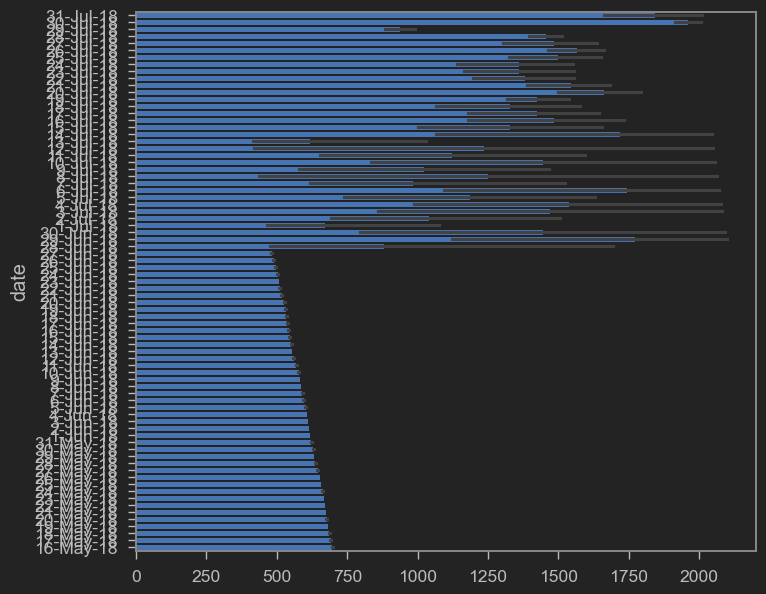

In [93]:
sns.barplot(amazon_reviews_clean["date"])

------------------
* summary-
* what we learn from this exploratort data analysis:
 - There are 3149 unique reviews, after we removed 1 of them for being NaN
 - 16 variations of the same product
 - majority of the reviews are positive and are 5 star reviews
 - the review text is also fairly short
 - most of the reviews are from july, although there is a consistent number of reviews that are since may and june.
-------
* Now we will perform word clouds on the reviews data to see common words and get a grasp of the reviews.
* later we will remove all punctuation and stopwords from the data
* utimatly we will tokanize the dataset

In [95]:
# Convert to list format
pos_sentences = positive['verified_reviews'].tolist()
len(pos_sentences)

2893

In [96]:
neg_sentences = negative['verified_reviews'].tolist()
len(neg_sentences)

257

In [144]:
pos_sentences_as_one_string = " ".join(pos_sentences)
pos_sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [146]:
# Join all reviews into one large string
neg_sentences_as_one_string = " ".join(map(str, neg_sentences))

In [148]:
neg_sentences_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

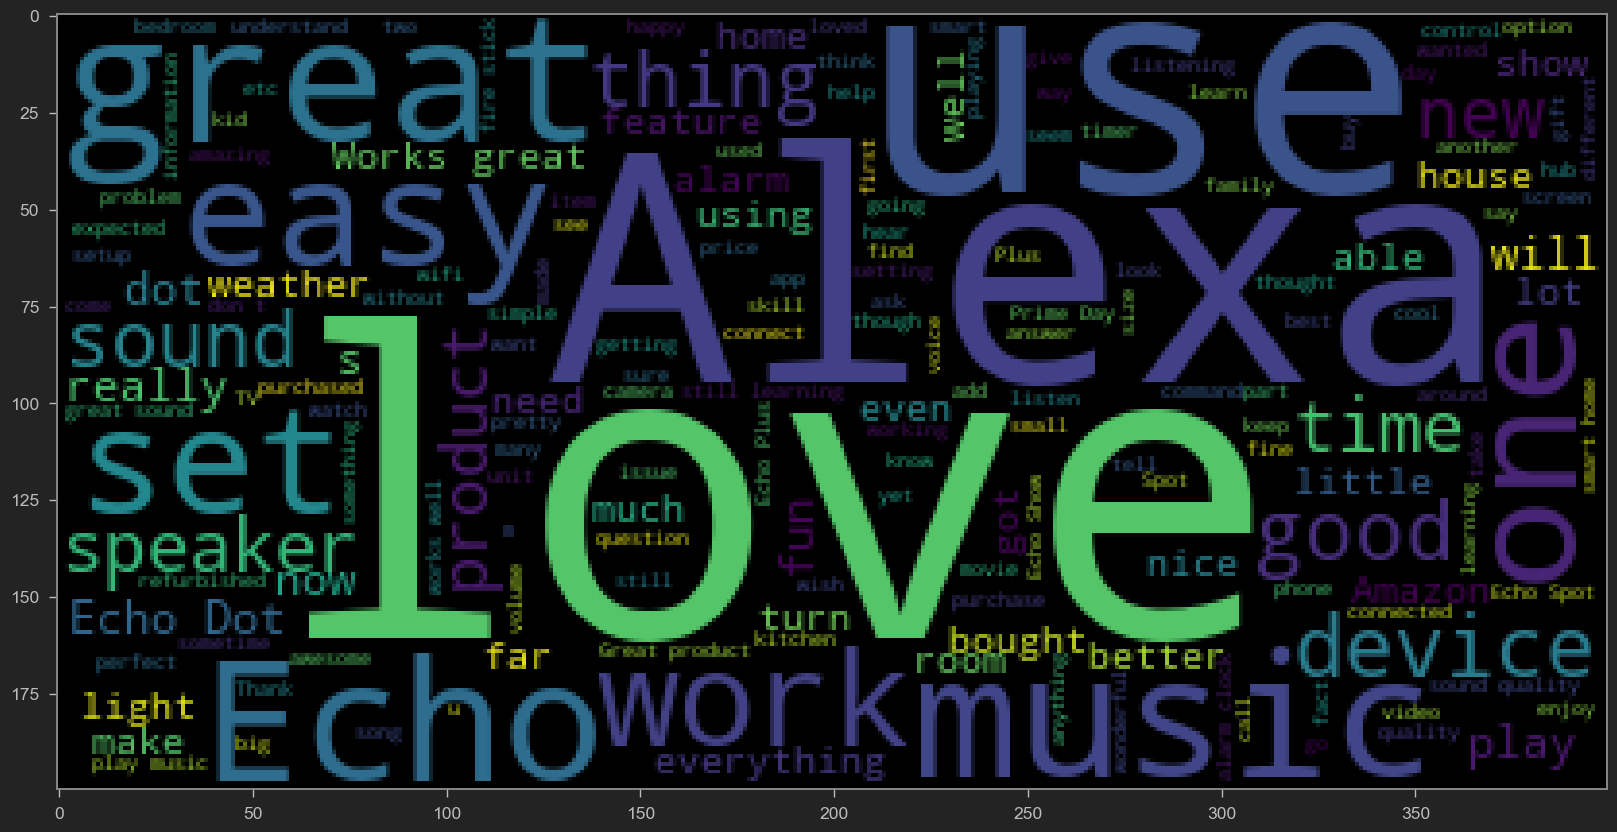

In [154]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_sentences_as_one_string))

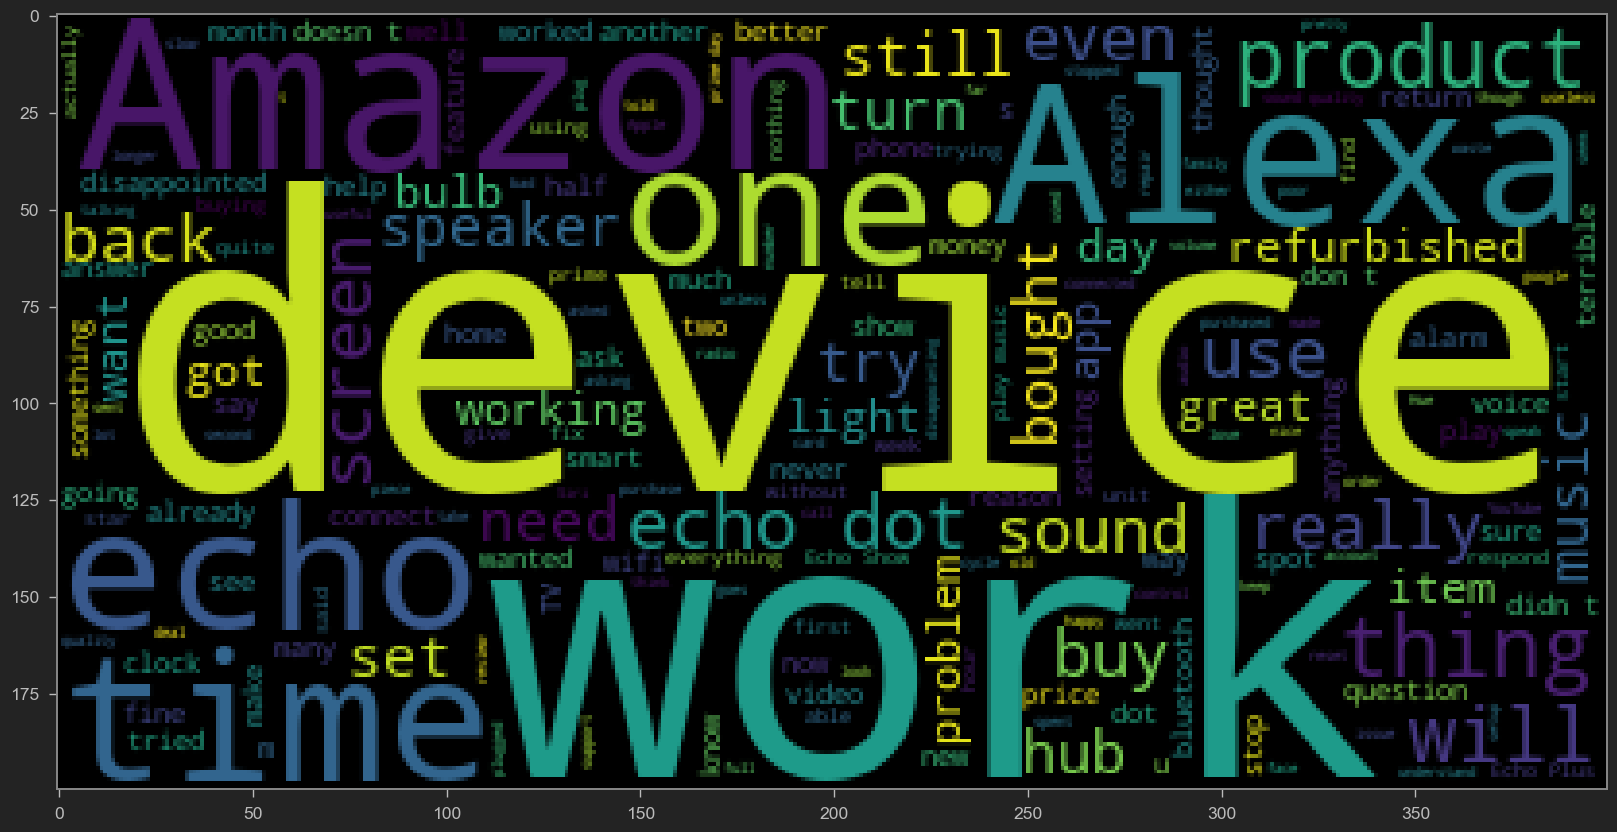

In [156]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

In [174]:
# a funtuon that performs data cleaning
def message_cleaning(message):
    test_punct_removed = [char for char in message if char not in string.punctuation]
    test_punct_removed_join= ''.join(test_punct_removed)
    
    test_stop_removed = [word for word in test_punct_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_stop_removed

In [176]:
amazon_reviews_final = amazon_reviews_clean['verified_reviews'].apply(message_cleaning)

In [182]:
amazon_reviews_final.head()

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
Name: verified_reviews, dtype: object

*  Perform Count Vectorization (Tokenization)

In [207]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(amazon_reviews_clean['verified_reviews'])

In [191]:
print(vectorizer.get_feature_names_out())

['16echodeviceshousecurrentlydeployedbedsidealarmclockusebasicallyechodotclockattachedmayoccasionallypullcameravideoAudioqualityscreenqualityreallyappropriatemusicwatchingvideoMuchtimeworkswellalarmclockseriousflawsparticularlylastonebedfirstwakedoesn’tseemlikeengineersactuallytestedbedroom2peopledifferentschedulesTrywalkingdarkbedroomsleepingwifewakingsaying“Alexasetalarm5am”Alexarepeat“OKalarmset5am”goodsupposecouldwhisperfumblevolumebuttonstupidPlainsimpledeviceneedsbrought1990’ssimpletouchscreeninterfaceaddedsetalarmknowcumbersomeinterfacesituationsonesetalarmalexaappphonethanksI’mpickingphonesetalarmusebuiltalarmsavestepleastengineersallowalarmturnedtouchscreenexamplewakeminutesearlycancelalarmwithoutspeakingwakingspouseinterfaceusingtouchscreencancelalarmgonehowevergreatseparatesnoozecancelbuttonsCurrentlytouchsnoozesswipecancelseasyhalfawakesnoozethinkcancelledsnoozedalarmgoesminuteslateramusedlongersleepingwifeletknowsummoningAlexaturnbathroomlightsI’mshower'
 '2Echosoneboughtb

In [193]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [195]:
reviews_countvectorizer.shape

(3149, 2222)

In [199]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [203]:
X = reviews
X

0     1     2     3     4     5     6     7     8     9     ...  2212  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3144     0     0     0     0     0     0     0     0     0     0  ...     0   
3145     0     0     0     0     0     0     0     0     0     0  ...     0   
3146     0     0     0     0     0     0     0     0     0     0  ...     0   
3147     0     0     0     0     0     0     0     0     0     0  ...     0   
3148     0     0     0     0     0     0     0     0     0     0  ...     0   

      2213  2214  2215  2216  2217  2218  2219  2220  2221  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
3144     0     0     0     0     0     0     0     0     0  
3145     0     0     0     0     0     0     0     0     0  
3146     0     0     0     0     0     0     0     0     0  
3147     0     0     0     0     0     0     0     0     0  
3148     0     0     0     0     0     0     0     0     0  

[3149 rows x 2222 columns]

In [211]:
y = amazon_reviews_clean['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3149, dtype: int64

In [213]:
# Applying naive bayes multinomial 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [215]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [217]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

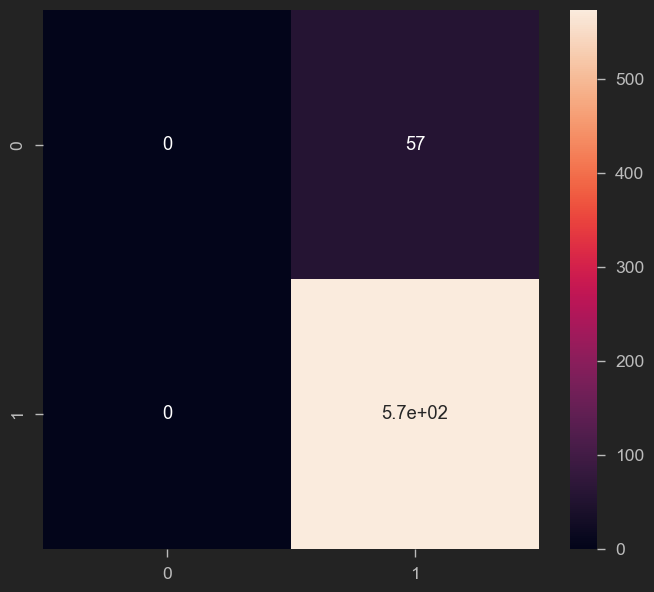

In [219]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [221]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.91      1.00      0.95       573

    accuracy                           0.91       630
   macro avg       0.45      0.50      0.48       630
weighted avg       0.83      0.91      0.87       630



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.91      1.00      0.95       573

    accuracy                           0.91       630
   macro avg       0.45      0.50      0.48       630
weighted avg       0.83      0.91      0.87       630



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


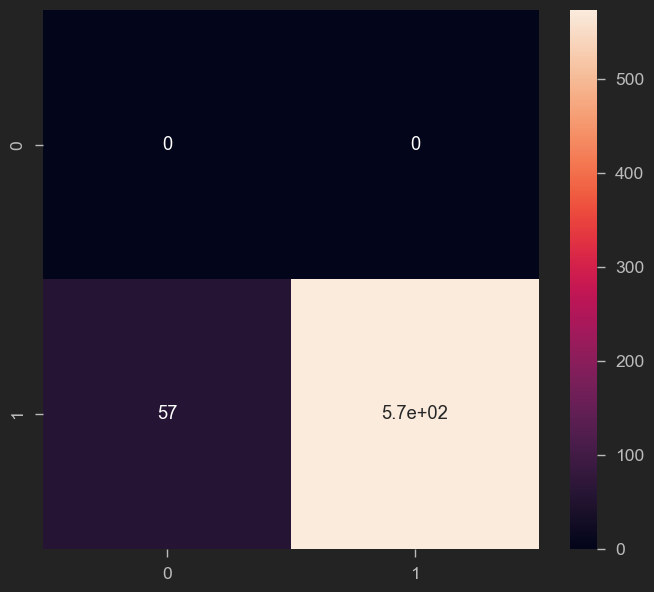

In [223]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))